MSE	Linear: 38.48,	Quadratic: 30.33,	Cubic: 28.88
R2	Linear: 0.54,	Quadratic: 0.64,	Cubic: 0.66


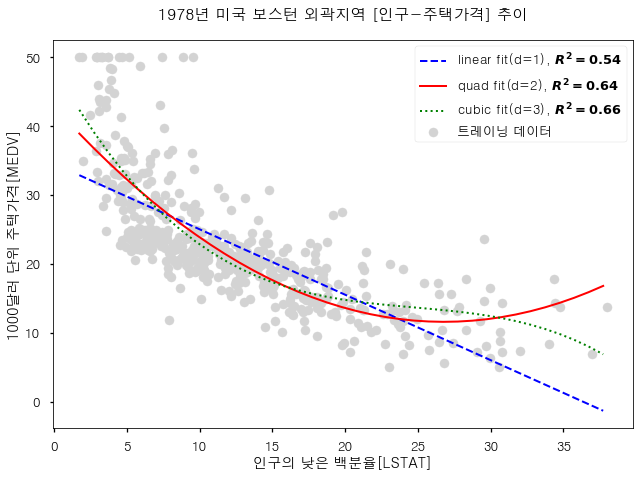

In [29]:
# 보스턴 외곽 지역 주택정보 14개 범주로 시작
# 회귀분석 - 다항회귀

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

style.use('seaborn-talk')

krfont = {'family':'HYGothic-Medium', 'weight':'bold', 'size':10}
matplotlib.rc('font', **krfont)
matplotlib.rcParams['axes.unicode_minus'] = False

df = pd.read_csv('./data/housing.data', header=None, sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

#Polynomial code

X = df[['LSTAT']].values
y = df['MEDV'].values


# lr : Linear Regression (선형 회귀)
# pr : Polynomial Regression (다항 회귀)
lr = LinearRegression()
#pr = LinearRegression()
#p3r = LinearRegression()

# 다항 회귀를 위한 n차항 추가
# degree = 2, 3
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)

# 트레이닝 데이터 X를 2차항이 적용된 다항 회귀 모델로 변형히여
# X_quad로 저장
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

# 비교를 위해 단순 회귀 계산
lr.fit(X, y)
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]
y_lin_fit = lr.predict(X_fit)
y_lin_pred = lr.predict(X)

# 다항 회귀를 위해 변형된 모델에 다중 회귀 모델 계산
lr.fit(X_quad, y)
y_quad_fit = lr.predict(quadratic.fit_transform(X_fit))
y_quad_pred = lr.predict(X_quad)

lr.fit(X_cubic, y)
y_cubic_fit = lr.predict(cubic.fit_transform(X_fit))
y_cubic_pred = lr.predict(X_cubic)


# 단순 회귀 및 다항 회귀 모델의 예측값 계산
mse_lin = mean_squared_error(y, y_lin_pred)
mse_quad = mean_squared_error(y, y_quad_pred)
mse_cubic = mean_squared_error(y, y_cubic_pred)

r2_lin = r2_score(y, y_lin_pred)
r2_quad = r2_score(y, y_quad_pred)
r2_cubic = r2_score(y, y_cubic_pred)

print('MSE\tLinear: %.2f,\tQuadratic: %.2f,\tCubic: %.2f' %(mse_lin, mse_quad, mse_cubic))
print('R2\tLinear: %.2f,\tQuadratic: %.2f,\tCubic: %.2f' %(r2_lin, r2_quad, r2_cubic))

#print('MSE\tLinear: %.2f,\tCubic: %.2f' %(mse_lin, mse_cubic))
#print('R2\tLinear: %.2f,\tCubic: %.2f' %(r2_lin, r2_cubic))

plt.scatter(X, y, label='트레이닝 데이터', c='lightgray')

plt.plot(X_fit, y_lin_fit, linestyle='--', label='linear fit(d=1), $R^2=%.2f$' %r2_lin, c='blue', lw=2)
plt.plot(X_fit, y_quad_fit, linestyle='-',label='quad fit(d=2), $R^2=%.2f$' %r2_quad, c='red', lw=2)
plt.plot(X_fit, y_cubic_fit, linestyle=':', label='cubic fit(d=3), $R^2=%.2f$' %r2_cubic, c='green', lw=2)

plt.xlabel('인구의 낮은 백분율[LSTAT]')
plt.ylabel('1000달러 단위 주택가격[MEDV]')
plt.title('1978년 미국 보스턴 외곽지역 [인구-주택가격] 추이\n')
plt.legend(loc=1)
plt.show()

# MSE : 평균제곱오차, 작을 수록 오차가 작다.
# R2 : 결정 계수, 1에 가까울 수록 적합도가 좋음 